In [59]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

In [60]:
# Load dataset
transaction_cleaned = pd.read_csv('transaction_cleaned.csv')

In [61]:
# Identify non-numeric columns
non_numeric_cols = transaction_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index([], dtype='object')


In [62]:
# Check datatypes
transaction_cleaned.dtypes

TransactionID                   int64
id_01                         float64
id_02                         float64
id_05                         float64
id_06                         float64
                               ...   
R_emaildomain_yahoo.com.mx       bool
R_emaildomain_yahoo.de           bool
R_emaildomain_yahoo.es           bool
R_emaildomain_yahoo.fr           bool
R_emaildomain_ymail.com          bool
Length: 508, dtype: object

In [63]:
# Checking what columns there are
columns = transaction_cleaned.columns.tolist()
print(columns)

['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V

In [64]:
# Wrapping the columns for display
pd.set_option('display.max_columns', None)
print(transaction_cleaned)

       TransactionID  id_01     id_02  id_05  id_06  id_11  id_17  id_19  \
0            2987004    0.0   70787.0    NaN    NaN  100.0  166.0  542.0   
1            2987008   -5.0   98945.0    0.0   -5.0  100.0  166.0  621.0   
2            2987010   -5.0  191631.0    0.0    0.0  100.0  121.0  410.0   
3            2987011   -5.0  221832.0    0.0   -6.0  100.0  225.0  176.0   
4            2987016    0.0    7460.0    1.0    0.0  100.0  166.0  529.0   
...              ...    ...       ...    ...    ...    ...    ...    ...   
29995        3065904   -5.0  115546.0    0.0   -3.0  100.0  166.0  352.0   
29996        3065905    0.0   12458.0    0.0    0.0  100.0  166.0  312.0   
29997        3065908    0.0   19909.0    0.0    0.0  100.0  166.0  312.0   
29998        3065910    0.0  108063.0   23.0  -13.0  100.0  166.0  263.0   
29999        3065912  -55.0   68163.0    2.0   -5.0  100.0  166.0  216.0   

       id_20  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0      144

In [65]:
# Create Exploratory Data Analysis

In [66]:
# EDA 1 - Missing Values Analysis
# Attempt to identify columns with missing data to decide on removal.
missing_percentage = transaction_cleaned.isnull().mean() * 100
plt.figure(figsize=(120, 90))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.title('Missing Values Percentage by Column')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Column Names')
plt.show()
missing_percentage

TransactionID                 0.000000
id_01                         0.000000
id_02                         2.406667
id_05                         5.333333
id_06                         5.333333
                                ...   
R_emaildomain_yahoo.com.mx    0.000000
R_emaildomain_yahoo.de        0.000000
R_emaildomain_yahoo.es        0.000000
R_emaildomain_yahoo.fr        0.000000
R_emaildomain_ymail.com       0.000000
Length: 508, dtype: float64

In [67]:
# Sort by percentage of missing values
# Attempt to identify what is best percentage for removal
sorted_df_desc = missing_percentage.sort_values(ascending=False)
sorted_df_desc

V258                             7.296667
V248                             7.296667
V246                             7.296667
V244                             7.296667
V243                             7.296667
                                   ...   
id_31_chrome 56.0                0.000000
id_31_chrome 55.0 for android    0.000000
id_31_chrome 55.0                0.000000
id_31_chrome 54.0 for android    0.000000
R_emaildomain_ymail.com          0.000000
Length: 508, dtype: float64

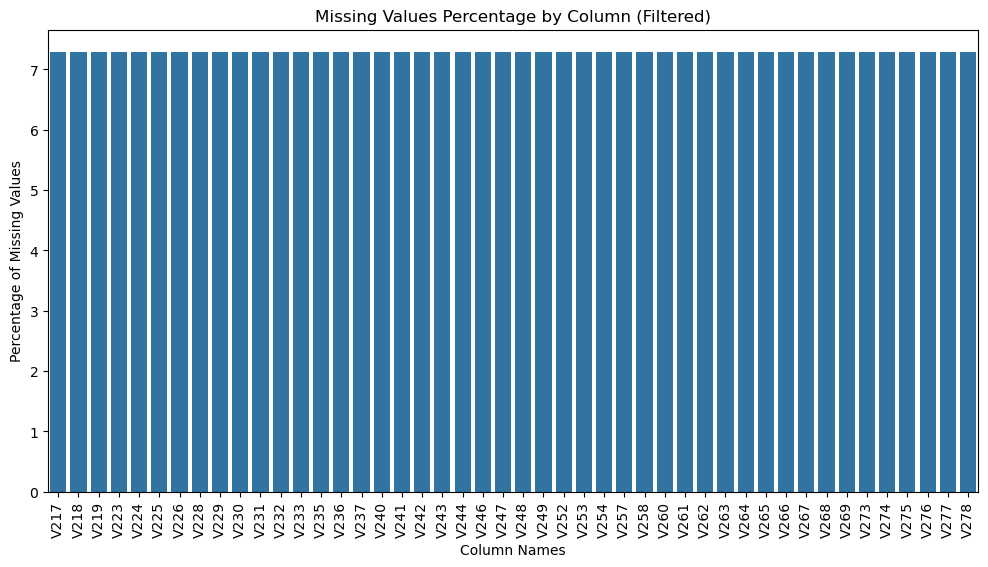

In [68]:
# Filter columns with missing percentage greater than 7
missing_percentage_filtered = missing_percentage[missing_percentage > 7]

# Plot the filtered missing percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_filtered.index, y=missing_percentage_filtered)
plt.xticks(rotation=90)
plt.title('Missing Values Percentage by Column (Filtered)')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Column Names')
plt.show()

In [69]:
# Identify columns to drop
columns_to_drop = missing_percentage_filtered.index
columns_to_drop

Index(['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229',
       'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241',
       'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253',
       'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265',
       'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277',
       'V278'],
      dtype='object')

In [70]:
# Drop columns with more than 7% missing values
transaction_cleaned = transaction_cleaned.drop(columns=columns_to_drop)
transaction_cleaned

TransactionID  id_01     id_02  id_05  id_06  id_11  id_17  id_19  \
0            2987004    0.0   70787.0    NaN    NaN  100.0  166.0  542.0   
1            2987008   -5.0   98945.0    0.0   -5.0  100.0  166.0  621.0   
2            2987010   -5.0  191631.0    0.0    0.0  100.0  121.0  410.0   
3            2987011   -5.0  221832.0    0.0   -6.0  100.0  225.0  176.0   
4            2987016    0.0    7460.0    1.0    0.0  100.0  166.0  529.0   
...              ...    ...       ...    ...    ...    ...    ...    ...   
29995        3065904   -5.0  115546.0    0.0   -3.0  100.0  166.0  352.0   
29996        3065905    0.0   12458.0    0.0    0.0  100.0  166.0  312.0   
29997        3065908    0.0   19909.0    0.0    0.0  100.0  166.0  312.0   
29998        3065910    0.0  108063.0   23.0  -13.0  100.0  166.0  263.0   
29999        3065912  -55.0   68163.0    2.0   -5.0  100.0  166.0  216.0   

       id_20  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0      144.0        0          86506          50.000   4497  514.0  150.0   
1      500.0        0          86535          15.000   2803  100.0  150.0   
2      142.0        0          86549          75.887  16496  352.0  117.0   
3      507.0        0          86555          16.495   4461  375.0  185.0   
4      575.0        0          86620          30.000   1790  555.0  150.0   
...      ...      ...            ...             ...    ...    ...    ...   
29995  222.0        0        1714130         100.000  11711  555.0  150.0   
29996  214.0        0        1714143          15.000  12839  321.0  150.0   
29997  214.0        0        1714171          15.000  12839  321.0  150.0   
29998  222.0        0        1714197          25.000   2455  321.0  150.0   
29999  214.0        0        1714206         500.000   7585  553.0  150.0   

       card5      C1      C2   C3     C4   C5     C6   C7     C8   C9    C10  \
0      102.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
1      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
2      134.0     1.0     4.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
3      224.0     1.0     1.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
4      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
...      ...     ...     ...  ...    ...  ...    ...  ...    ...  ...    ...   
29995  226.0     1.0     1.0  0.0    1.0  0.0    1.0  0.0    1.0  0.0    1.0   
29996  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29997  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29998  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29999  226.0  1079.0  1187.0  0.0  786.0  0.0  797.0  0.0  475.0  0.0  401.0   

         C11  C12    C13    C14   D1  V95  V96  V97  V98  V99  V100  V101  \
0        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2        2.0  2.0    2.0    1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
3        1.0  1.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
4        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
...      ...  ...    ...    ...  ...  ...  ...  ...  ...  ...   ...   ...   
29995    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29996    1.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29997    1.0  0.0    1.0    1.0  0.0  1.0  1.0  1.0  0.0  0.0   0.0   0.0   
29998    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29999  851.0  0.0  609.0  553.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   

       V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  \
0       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2       0.0   0.0   0.0   0.0   0.0   1.

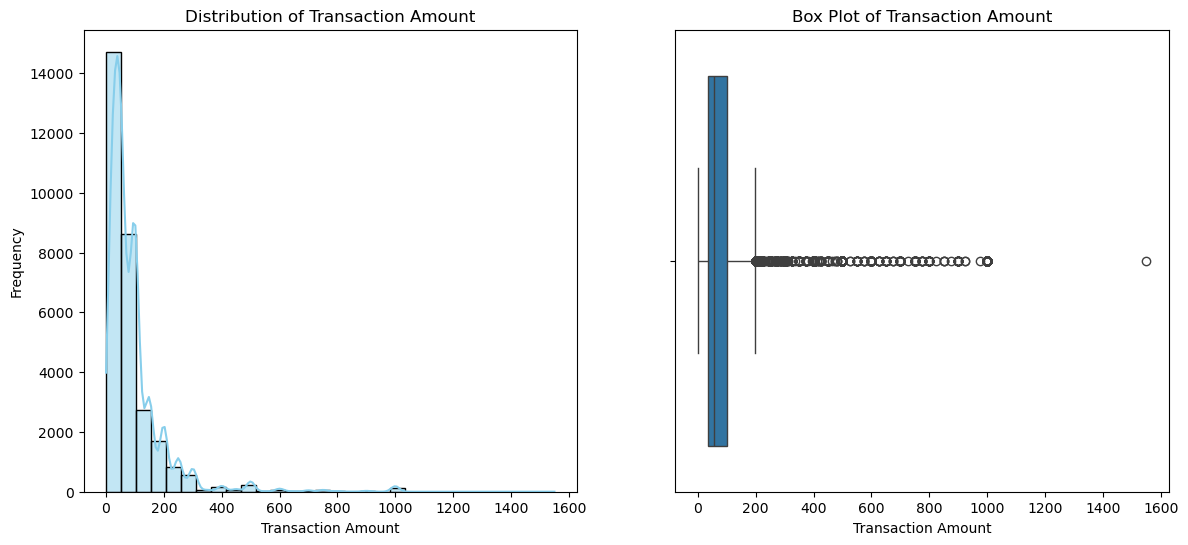

In [71]:
# EDA 2 - Numerical Data Analysis
# Attempt to understand the distribution and detect outliers in transaction amounts.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(transaction_cleaned['TransactionAmt'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=transaction_cleaned['TransactionAmt'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

# Finding - Most transactions are under $200, but does not show which amount are prone to fraud

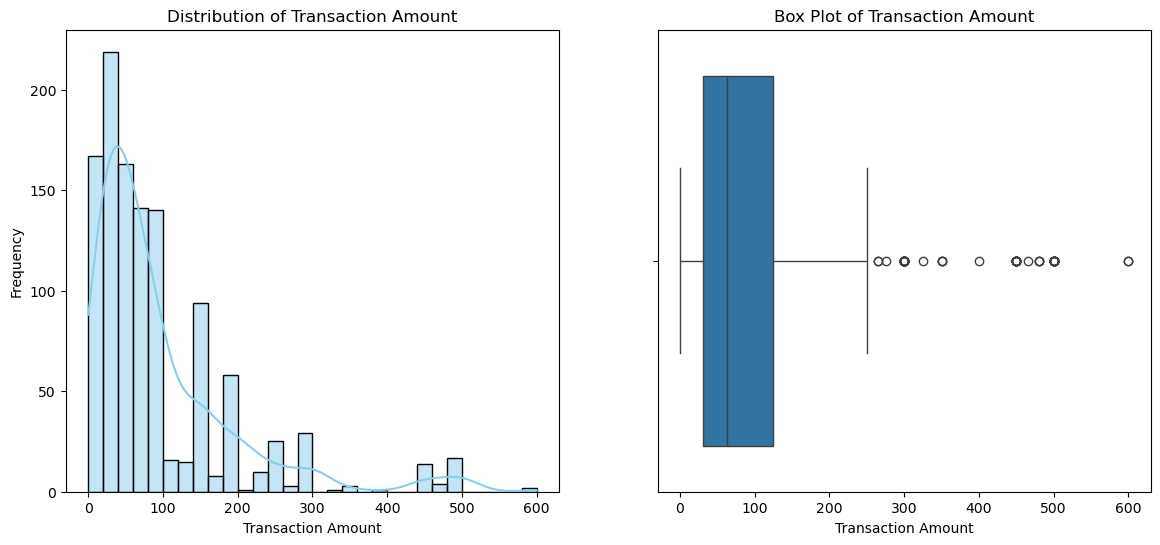

In [72]:
# Filter fraudulent transactions
transaction_cleaned_fraud = transaction_cleaned[transaction_cleaned['isFraud']==1]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(transaction_cleaned_fraud['TransactionAmt'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=transaction_cleaned_fraud['TransactionAmt'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

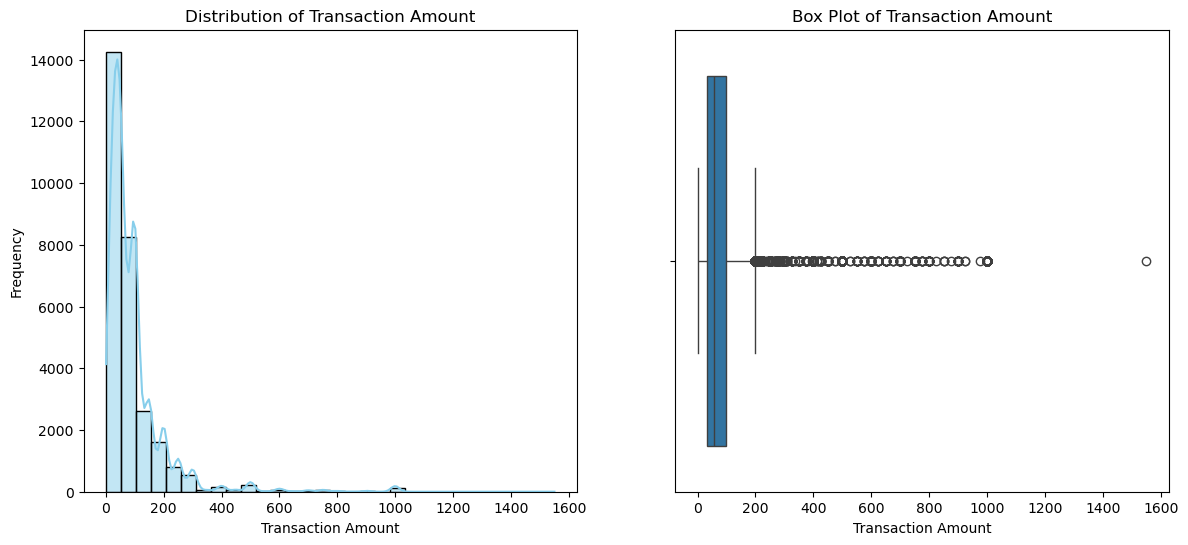

In [73]:
# Filter non-fraudulent transactions
transaction_cleaned_notfraud = transaction_cleaned[transaction_cleaned['isFraud']==0]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(transaction_cleaned_notfraud['TransactionAmt'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=transaction_cleaned_notfraud['TransactionAmt'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

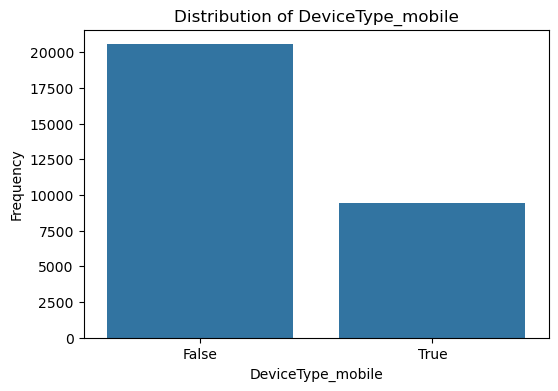

In [74]:
# EDA 3 - Visualize Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='DeviceType_mobile', data=transaction_cleaned)
plt.title('Distribution of DeviceType_mobile')
plt.xlabel('DeviceType_mobile')
plt.ylabel('Frequency')
plt.show()

# Finding - More fraud with transactions through non-mobile devices

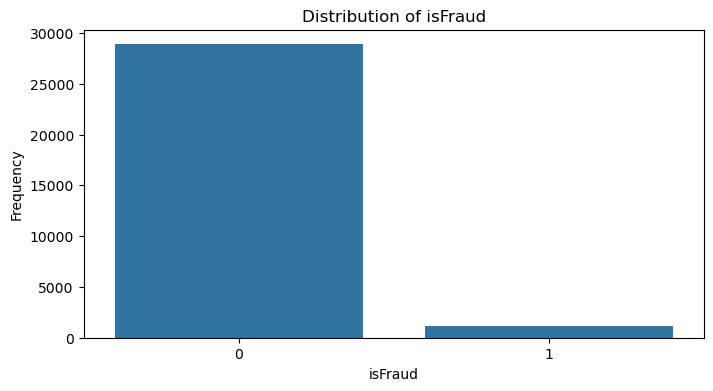

In [75]:
# EDA 4 - Categorical Data Analysis
# Attempt to Examine the distribution of fraud instances.
def plot_categorical_distribution(column):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=transaction_cleaned)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_categorical_distribution('isFraud')

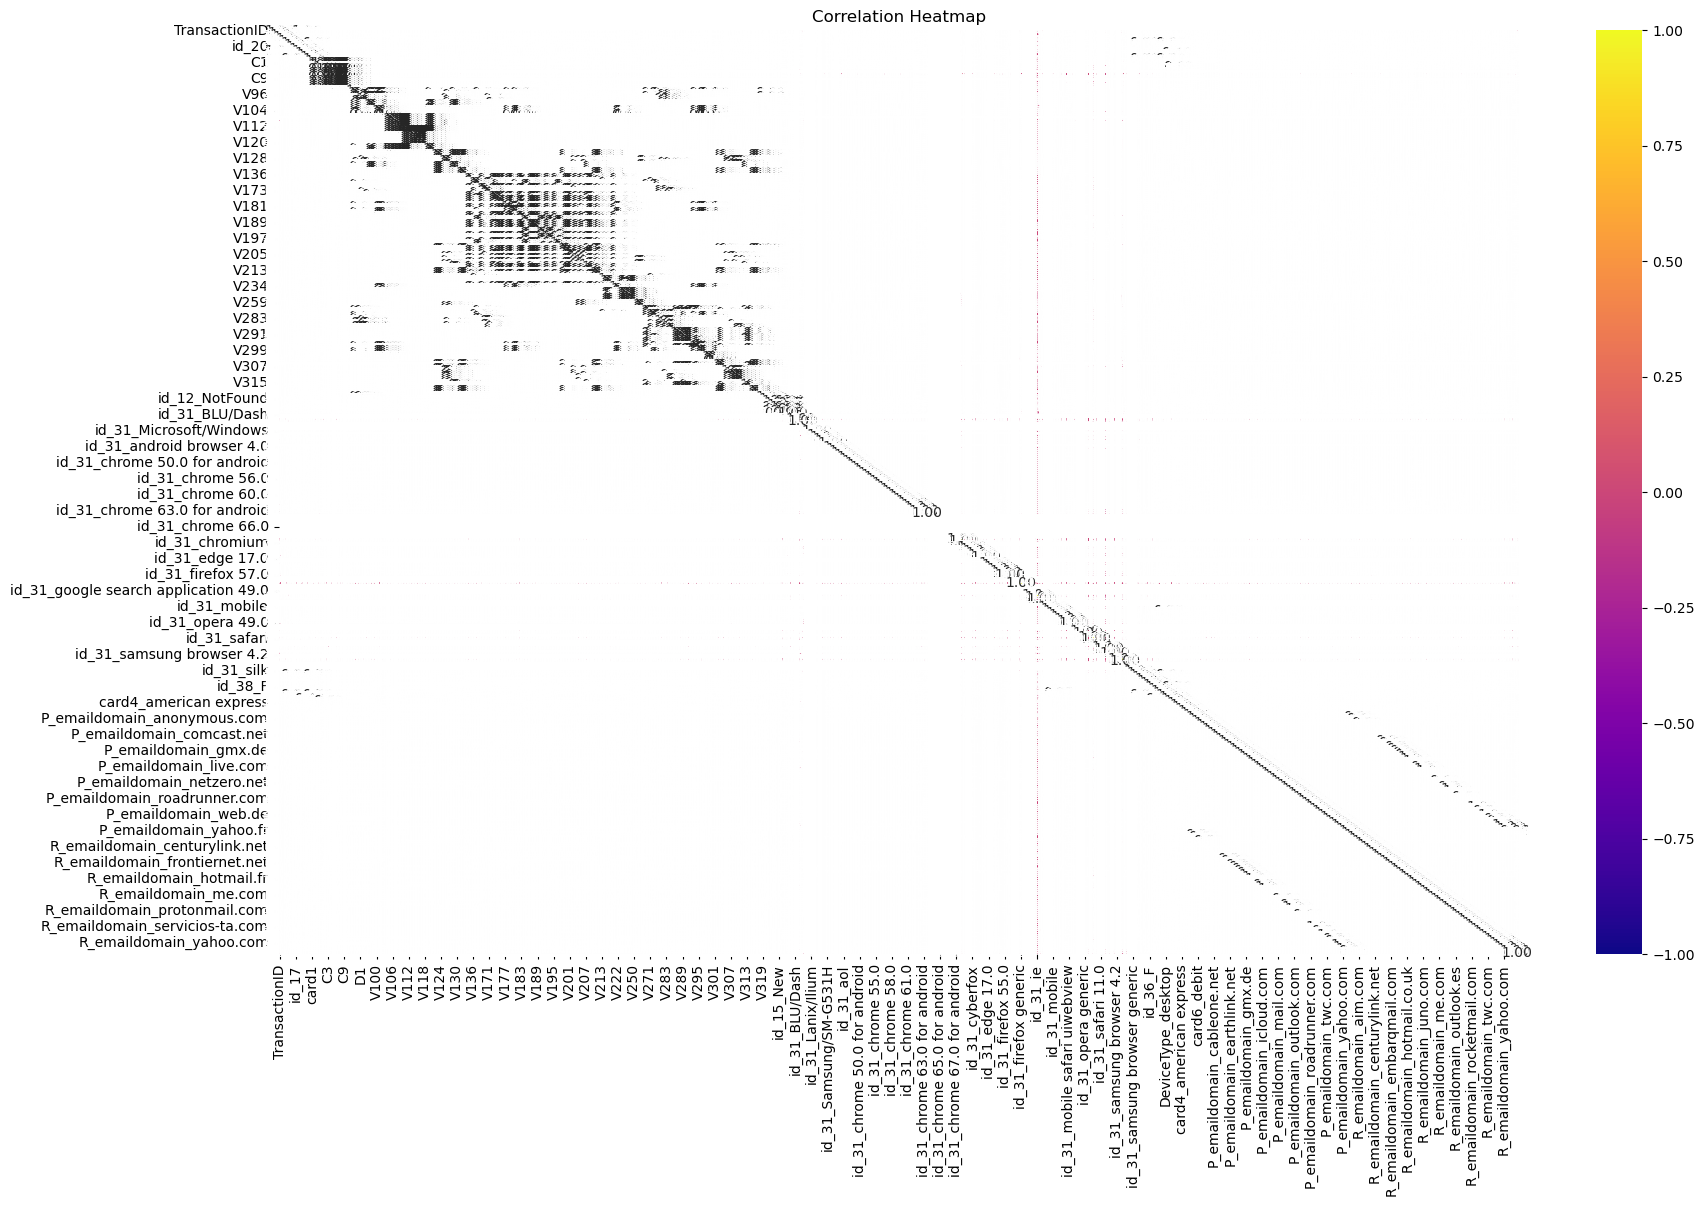

In [76]:
# EDA 5 - Correlation Analysis
# Attempt to identify relationships between numerical features, to detect strong correlations that could inform feature selection.
corr_matrix = transaction_cleaned.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [77]:
# Model Development

In [78]:
# Handle NaN values and replace with mean
df_mean = transaction_cleaned.fillna(transaction_cleaned.mean())
df_mean

TransactionID  id_01     id_02      id_05      id_06  id_11  id_17  \
0            2987004    0.0   70787.0   1.941549  -5.952324  100.0  166.0   
1            2987008   -5.0   98945.0   0.000000  -5.000000  100.0  166.0   
2            2987010   -5.0  191631.0   0.000000   0.000000  100.0  121.0   
3            2987011   -5.0  221832.0   0.000000  -6.000000  100.0  225.0   
4            2987016    0.0    7460.0   1.000000   0.000000  100.0  166.0   
...              ...    ...       ...        ...        ...    ...    ...   
29995        3065904   -5.0  115546.0   0.000000  -3.000000  100.0  166.0   
29996        3065905    0.0   12458.0   0.000000   0.000000  100.0  166.0   
29997        3065908    0.0   19909.0   0.000000   0.000000  100.0  166.0   
29998        3065910    0.0  108063.0  23.000000 -13.000000  100.0  166.0   
29999        3065912  -55.0   68163.0   2.000000  -5.000000  100.0  166.0   

       id_19  id_20  isFraud  TransactionDT  TransactionAmt  card1  card2  \
0      542.0  144.0        0          86506          50.000   4497  514.0   
1      621.0  500.0        0          86535          15.000   2803  100.0   
2      410.0  142.0        0          86549          75.887  16496  352.0   
3      176.0  507.0        0          86555          16.495   4461  375.0   
4      529.0  575.0        0          86620          30.000   1790  555.0   
...      ...    ...      ...            ...             ...    ...    ...   
29995  352.0  222.0        0        1714130         100.000  11711  555.0   
29996  312.0  214.0        0        1714143          15.000  12839  321.0   
29997  312.0  214.0        0        1714171          15.000  12839  321.0   
29998  263.0  222.0        0        1714197          25.000   2455  321.0   
29999  216.0  214.0        0        1714206         500.000   7585  553.0   

       card3  card5      C1      C2   C3     C4   C5     C6   C7     C8   C9  \
0      150.0  102.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
1      150.0  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
2      117.0  134.0     1.0     4.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0   
3      185.0  224.0     1.0     1.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0   
4      150.0  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
...      ...    ...     ...     ...  ...    ...  ...    ...  ...    ...  ...   
29995  150.0  226.0     1.0     1.0  0.0    1.0  0.0    1.0  0.0    1.0  0.0   
29996  150.0  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
29997  150.0  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
29998  150.0  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0   
29999  150.0  226.0  1079.0  1187.0  0.0  786.0  0.0  797.0  0.0  475.0  0.0   

         C10    C11  C12    C13    C14   D1  V95  V96  V97  V98  V99  V100  \
0        1.0    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
1        1.0    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
2        1.0    2.0  2.0    2.0    1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
3        1.0    1.0  1.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
4        1.0    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...      ...    ...  ...    ...    ...  ...  ...  ...  ...  ...  ...   ...   
29995    1.0    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
29996    1.0    1.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
29997    1.0    1.0  0.0    1.0    1.0  0.0  1.0  1.0  1.0  0.0  0.0   0.0   
29998    1.0    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
29999  401.0  851.0  0.0  609.0  553.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

       V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  \
0       0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
2       0.0   0.

In [79]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 462 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(179), int64(4)
memory usage: 49.9 MB


In [80]:
df_med = transaction_cleaned.fillna(transaction_cleaned.median())
df_med

TransactionID  id_01     id_02  id_05  id_06  id_11  id_17  id_19  \
0            2987004    0.0   70787.0    0.0    0.0  100.0  166.0  542.0   
1            2987008   -5.0   98945.0    0.0   -5.0  100.0  166.0  621.0   
2            2987010   -5.0  191631.0    0.0    0.0  100.0  121.0  410.0   
3            2987011   -5.0  221832.0    0.0   -6.0  100.0  225.0  176.0   
4            2987016    0.0    7460.0    1.0    0.0  100.0  166.0  529.0   
...              ...    ...       ...    ...    ...    ...    ...    ...   
29995        3065904   -5.0  115546.0    0.0   -3.0  100.0  166.0  352.0   
29996        3065905    0.0   12458.0    0.0    0.0  100.0  166.0  312.0   
29997        3065908    0.0   19909.0    0.0    0.0  100.0  166.0  312.0   
29998        3065910    0.0  108063.0   23.0  -13.0  100.0  166.0  263.0   
29999        3065912  -55.0   68163.0    2.0   -5.0  100.0  166.0  216.0   

       id_20  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0      144.0        0          86506          50.000   4497  514.0  150.0   
1      500.0        0          86535          15.000   2803  100.0  150.0   
2      142.0        0          86549          75.887  16496  352.0  117.0   
3      507.0        0          86555          16.495   4461  375.0  185.0   
4      575.0        0          86620          30.000   1790  555.0  150.0   
...      ...      ...            ...             ...    ...    ...    ...   
29995  222.0        0        1714130         100.000  11711  555.0  150.0   
29996  214.0        0        1714143          15.000  12839  321.0  150.0   
29997  214.0        0        1714171          15.000  12839  321.0  150.0   
29998  222.0        0        1714197          25.000   2455  321.0  150.0   
29999  214.0        0        1714206         500.000   7585  553.0  150.0   

       card5      C1      C2   C3     C4   C5     C6   C7     C8   C9    C10  \
0      102.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
1      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
2      134.0     1.0     4.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
3      224.0     1.0     1.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
4      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
...      ...     ...     ...  ...    ...  ...    ...  ...    ...  ...    ...   
29995  226.0     1.0     1.0  0.0    1.0  0.0    1.0  0.0    1.0  0.0    1.0   
29996  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29997  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29998  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29999  226.0  1079.0  1187.0  0.0  786.0  0.0  797.0  0.0  475.0  0.0  401.0   

         C11  C12    C13    C14   D1  V95  V96  V97  V98  V99  V100  V101  \
0        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2        2.0  2.0    2.0    1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
3        1.0  1.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
4        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
...      ...  ...    ...    ...  ...  ...  ...  ...  ...  ...   ...   ...   
29995    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29996    1.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29997    1.0  0.0    1.0    1.0  0.0  1.0  1.0  1.0  0.0  0.0   0.0   0.0   
29998    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29999  851.0  0.0  609.0  553.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   

       V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  \
0       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2       0.0   0.0   0.0   0.0   0.0   1.

In [81]:
#Review data 
df_mean.dtypes

TransactionID                   int64
id_01                         float64
id_02                         float64
id_05                         float64
id_06                         float64
                               ...   
R_emaildomain_yahoo.com.mx       bool
R_emaildomain_yahoo.de           bool
R_emaildomain_yahoo.es           bool
R_emaildomain_yahoo.fr           bool
R_emaildomain_ymail.com          bool
Length: 462, dtype: object

In [82]:
X = df_mean.drop(columns=('isFraud'))
X

TransactionID  id_01     id_02      id_05      id_06  id_11  id_17  \
0            2987004    0.0   70787.0   1.941549  -5.952324  100.0  166.0   
1            2987008   -5.0   98945.0   0.000000  -5.000000  100.0  166.0   
2            2987010   -5.0  191631.0   0.000000   0.000000  100.0  121.0   
3            2987011   -5.0  221832.0   0.000000  -6.000000  100.0  225.0   
4            2987016    0.0    7460.0   1.000000   0.000000  100.0  166.0   
...              ...    ...       ...        ...        ...    ...    ...   
29995        3065904   -5.0  115546.0   0.000000  -3.000000  100.0  166.0   
29996        3065905    0.0   12458.0   0.000000   0.000000  100.0  166.0   
29997        3065908    0.0   19909.0   0.000000   0.000000  100.0  166.0   
29998        3065910    0.0  108063.0  23.000000 -13.000000  100.0  166.0   
29999        3065912  -55.0   68163.0   2.000000  -5.000000  100.0  166.0   

       id_19  id_20  TransactionDT  TransactionAmt  card1  card2  card3  \
0      542.0  144.0          86506          50.000   4497  514.0  150.0   
1      621.0  500.0          86535          15.000   2803  100.0  150.0   
2      410.0  142.0          86549          75.887  16496  352.0  117.0   
3      176.0  507.0          86555          16.495   4461  375.0  185.0   
4      529.0  575.0          86620          30.000   1790  555.0  150.0   
...      ...    ...            ...             ...    ...    ...    ...   
29995  352.0  222.0        1714130         100.000  11711  555.0  150.0   
29996  312.0  214.0        1714143          15.000  12839  321.0  150.0   
29997  312.0  214.0        1714171          15.000  12839  321.0  150.0   
29998  263.0  222.0        1714197          25.000   2455  321.0  150.0   
29999  216.0  214.0        1714206         500.000   7585  553.0  150.0   

       card5      C1      C2   C3     C4   C5     C6   C7     C8   C9    C10  \
0      102.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
1      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
2      134.0     1.0     4.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
3      224.0     1.0     1.0  0.0    1.0  0.0    1.0  1.0    1.0  0.0    1.0   
4      226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
...      ...     ...     ...  ...    ...  ...    ...  ...    ...  ...    ...   
29995  226.0     1.0     1.0  0.0    1.0  0.0    1.0  0.0    1.0  0.0    1.0   
29996  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29997  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29998  226.0     1.0     1.0  0.0    0.0  0.0    1.0  0.0    1.0  0.0    1.0   
29999  226.0  1079.0  1187.0  0.0  786.0  0.0  797.0  0.0  475.0  0.0  401.0   

         C11  C12    C13    C14   D1  V95  V96  V97  V98  V99  V100  V101  \
0        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
1        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
2        2.0  2.0    2.0    1.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
3        1.0  1.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
4        1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
...      ...  ...    ...    ...  ...  ...  ...  ...  ...  ...   ...   ...   
29995    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29996    1.0  0.0    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29997    1.0  0.0    1.0    1.0  0.0  1.0  1.0  1.0  0.0  0.0   0.0   0.0   
29998    1.0  0.0    1.0    1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   
29999  851.0  0.0  609.0  553.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   

       V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  \
0       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2       0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.

In [83]:
# Define target(y)
y = df_mean['isFraud']
y

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: isFraud, Length: 30000, dtype: int64

In [84]:
# Apply train_test_split to data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [85]:
# Display X_train
X_train

TransactionID  id_01     id_02  id_05  id_06  id_11  id_17  id_19  \
26340        3058857  -10.0  101528.0    0.0    0.0  100.0  225.0  607.0   
3877         3003670   -5.0  155753.0    3.0  -15.0  100.0  166.0  352.0   
27081        3060191   -5.0  112419.0    0.0    0.0  100.0  225.0  427.0   
5440         3008642   -5.0   32818.0   17.0  -26.0  100.0  166.0  337.0   
22164        3050162   -5.0  149155.0    0.0    0.0  100.0  225.0  266.0   
...              ...    ...       ...    ...    ...    ...    ...    ...   
17289        3039159   -5.0   51460.0    0.0    0.0  100.0  166.0  410.0   
5192         3007951    0.0  143975.0    0.0    0.0  100.0  225.0  266.0   
12172        3026801   -5.0   25811.0    0.0    0.0  100.0  166.0  312.0   
235          2987779   -5.0    4235.0    0.0    0.0  100.0  166.0  397.0   
29733        3065447   -5.0   40821.0    0.0    0.0  100.0  166.0  542.0   

       id_20  TransactionDT  TransactionAmt  card1  card2  card3  card5   C1  \
26340  561.0        1614571          64.713   4461  375.0  185.0  224.0  2.0   
3877   549.0         439467         250.000  15320  555.0  150.0  117.0  2.0   
27081  595.0        1626380          23.903  15885  545.0  185.0  138.0  1.0   
5440   214.0         573478          75.000  10486  514.0  150.0  219.0  1.0   
22164  507.0        1442481          32.356  13832  375.0  185.0  224.0  1.0   
...      ...            ...             ...    ...    ...    ...    ...  ...   
17289  484.0        1217601         250.000   1608  555.0  150.0  226.0  1.0   
5192   305.0         533254          19.697  16773  204.0  185.0  138.0  3.0   
12172  222.0         965018          50.000   7978  562.0  150.0  219.0  1.0   
235    161.0         102154          10.000   7481  364.0  146.0  166.0  1.0   
29733  266.0        1709796         100.000  16659  170.0  150.0  226.0  1.0   

        C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14     D1  \
26340  2.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    0.0   
3877   1.0  0.0  2.0  0.0  1.0  0.0  2.0  0.0  2.0  1.0  0.0  2.0  2.0  350.0   
27081  2.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0    0.0   
5440   1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0    0.0   
22164  2.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  2.0  1.0    7.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
17289  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0    0.0   
5192   2.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  2.0  2.0  2.0  2.0  2.0    0.0   
12172  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0    0.0   
235    1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0    0.0   
29733  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0    0.0   

       V95  V96  V97  V98  V99  V100  V101  V102  V103  V104  V105  V106  \
26340  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3877   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
27081  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5440   0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
22164  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
...    ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
17289  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5192   2.0  2.0  2.0  0.0  0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
12172  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
235    0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
29733  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       V107  V108  V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  \
26340   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3877    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2708

In [86]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 462 entries, TransactionID to R_emaildomain_ymail.com
dtypes: bool(279), float64(179), int64(4)
memory usage: 49.9 MB


In [87]:
nan_data = X_train.isnull().sum()
print(nan_data)

TransactionID                 0
id_01                         0
id_02                         0
id_05                         0
id_06                         0
                             ..
R_emaildomain_yahoo.com.mx    0
R_emaildomain_yahoo.de        0
R_emaildomain_yahoo.es        0
R_emaildomain_yahoo.fr        0
R_emaildomain_ymail.com       0
Length: 461, dtype: int64


In [88]:
#Display X_test
X_test

TransactionID  id_01     id_02  id_05  id_06       id_11  id_17  id_19  \
10747        3023360   -5.0  107315.0   10.0 -100.0  100.000000  166.0  122.0   
12573        3027744   -5.0  115929.0    1.0    0.0   95.699997  166.0  100.0   
29676        3065336   -5.0  999074.0   14.0   -3.0  100.000000  166.0  410.0   
8856         3018476   -5.0  491439.0    6.0   -1.0  100.000000  166.0  621.0   
21098        3047848   -5.0  270660.0    5.0    0.0  100.000000  166.0  410.0   
...              ...    ...       ...    ...    ...         ...    ...    ...   
29317        3064677   -5.0   61467.0    0.0   -6.0  100.000000  166.0  193.0   
18629        3042169   -5.0  163791.0    0.0    0.0  100.000000  225.0  290.0   
15329        3034394  -10.0  119772.0    0.0   -8.0  100.000000  202.0  410.0   
14587        3032586    0.0   89899.0    0.0    0.0  100.000000  166.0  542.0   
15011        3033526    0.0  109812.0    3.0    0.0  100.000000  166.0  529.0   

       id_20  TransactionDT  TransactionAmt  card1  card2  card3  card5  \
10747  597.0         884102          30.000  11157  215.0  150.0  226.0   
12573  500.0        1007838          85.250   6378  111.0  150.0  137.0   
29676  489.0        1708553          50.000  16215  555.0  150.0  226.0   
8856   394.0         776038         300.000   2616  327.0  150.0  102.0   
21098  222.0        1379465         100.000  13809  583.0  150.0  226.0   
...      ...            ...             ...    ...    ...    ...    ...   
29317  535.0        1702722         200.000  14365  215.0  150.0  203.0   
18629  401.0        1285211          57.834  15885  545.0  185.0  138.0   
15329  435.0        1122690          72.000   7861  494.0  150.0  226.0   
14587  333.0        1099280         100.000  15791  399.0  150.0  198.0   
15011  575.0        1110579         100.000  18227  583.0  150.0  226.0   

           C1      C2   C3      C4   C5      C6      C7      C8   C9     C10  \
10747     2.0     2.0  0.0     1.0  0.0     2.0     0.0     2.0  0.0     2.0   
12573     1.0     1.0  1.0     1.0  0.0     0.0     0.0     1.0  0.0     1.0   
29676     1.0     1.0  0.0     1.0  0.0     1.0     0.0     1.0  0.0     1.0   
8856      1.0     1.0  0.0     2.0  0.0     1.0     0.0     1.0  0.0     1.0   
21098     1.0     1.0  0.0     1.0  0.0     1.0     0.0     1.0  0.0     1.0   
...       ...     ...  ...     ...  ...     ...     ...     ...  ...     ...   
29317     1.0     1.0  0.0     1.0  0.0     1.0     0.0     1.0  0.0     1.0   
18629  4425.0  5200.0  0.0  2114.0  0.0  2114.0  2115.0  3150.0  0.0  3089.0   
15329     2.0     2.0  0.0     1.0  0.0     1.0     0.0     1.0  0.0     1.0   
14587     1.0     1.0  0.0     0.0  0.0     1.0     0.0     1.0  0.0     1.0   
15011     1.0     1.0  0.0     0.0  0.0     2.0     0.0     1.0  0.0     1.0   

          C11     C12     C13     C14     D1  V95  V96  V97  V98  V99  V100  \
10747     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
12573     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
29676     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
8856      2.0     0.0     1.0     1.0    0.0  1.0  1.0  1.0  1.0  1.0   1.0   
21098     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...       ...     ...     ...     ...    ...  ...  ...  ...  ...  ...   ...   
29317     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
18629  3006.0  3006.0  2706.0  1336.0  310.0  0.0  0.0  0.0  0.0  0.0   0.0   
15329     2.0     0.0     0.0     0.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
14587     1.0     0.0     1.0     1.0    0.0  0.0  0.0  0.0  0.0  0.0   0.0   
15011     1.0     0.0     1.0     1.0    0.0  2.0  2.0  2.0  0.0  0.0   0.0   

       V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  V111  V112  \
10747   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   
12573   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0  

In [89]:
# Check the number of fraud vs. not fraud('isFraud')
# using value_counts
df_mean['isFraud'].value_counts()

isFraud
0    28869
1     1131
Name: count, dtype: int64

In [90]:
# Calculate value counts with percentages
value_counts = transaction_cleaned['isFraud'].value_counts(normalize=True) * 100
# Display the percentages
print(value_counts)

isFraud
0    96.23
1     3.77
Name: proportion, dtype: float64


In [91]:
# Train Logistic Regression
# Create a `LogisticRegression` function to lr_model 
lr_model = LogisticRegression(max_iter=1000, random_state=15)
# Fit train data to LogisticRegression model
lr_model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=15)

In [92]:
# Print the logistic regression Train and Test
print(f"Logistic Regression Training data :{lr_model.score(X_train, y_train)}")
print(f"Logistic Regression Training data :{lr_model.score(X_test, y_test)}")

Logistic Regression Training data :0.9624888888888888
Logistic Regression Training data :0.9628


In [93]:
# Create Prediction based on the Logistic Regression model fitted
predictions = lr_model.predict(X_train)
# Convert and display predictions vs actual data to a DataFrame
fraud_results_df = pd.DataFrame({"Prediction": predictions, "Actual": y_train})
fraud_results_df

Prediction  Actual
26340           0       0
3877            0       0
27081           0       0
5440            0       0
22164           0       0
...           ...     ...
17289           0       0
5192            0       0
12172           0       0
235             0       1
29733           0       0

[22500 rows x 2 columns]

In [94]:
# Predictions applied to testing data
test_predictions = lr_model.predict(X_test)

# Convert and display predictions vs actual data of test data to DF
fraud_test_result = pd.DataFrame({ "Test Predictions":test_predictions, "Actual": y_test})
fraud_test_result

Test Predictions  Actual
10747                 0       0
12573                 0       0
29676                 0       0
8856                  0       1
21098                 0       0
...                 ...     ...
29317                 0       0
18629                 0       0
15329                 0       0
14587                 0       0
15011                 0       0

[7500 rows x 2 columns]

In [95]:
# Calculate the model accuracy score using y_test and testing 
accuracy_score= accuracy_score(y_test, test_predictions)
print(f"Your accuracy score for the model is: {accuracy_score}")

Your accuracy score for the model is: 0.9628


In [96]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [97]:
# Train Random Forest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=15)
forest.fit(X_train_scaled, y_train)


# Evaluate the model
print(f'Training Score: {forest.score(X_train_scaled, y_train)}')
print(f'Testing Score: {forest.score(X_test_scaled, y_test)}')

Training Score: 0.9999111111111111
Testing Score: 0.9806666666666667


In [98]:
# Randomforest prediction on X_test
y_pred_forest = forest.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7224
           1       0.30      0.12      0.17       276

    accuracy                           0.96      7500
   macro avg       0.64      0.55      0.57      7500
weighted avg       0.94      0.96      0.95      7500



/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [99]:
# Get the feature importance array
feature_importances = forest.feature_importances_

In [100]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:50]

[(0.0268474573101768, 'C1'),
 (0.023740781137990236, 'TransactionID'),
 (0.021615021621078628, 'id_02'),
 (0.021484483974041797, 'TransactionDT'),
 (0.021421658093734284, 'V201'),
 (0.021077476565544345, 'TransactionAmt'),
 (0.020881576384510356, 'C11'),
 (0.019380742155856105, 'card1'),
 (0.019118099929960046, 'C2'),
 (0.01870285818358167, 'C13'),
 (0.01809254244418142, 'C14'),
 (0.01728253617571907, 'card2'),
 (0.01724967117748241, 'V259'),
 (0.016993967560079717, 'V245'),
 (0.016923424542821183, 'C12'),
 (0.016453796776717215, 'id_19'),
 (0.016154836529134003, 'id_20'),
 (0.015011849109769278, 'C7'),
 (0.014625074662537587, 'V188'),
 (0.014495463364549198, 'C6'),
 (0.013486625848904456, 'V189'),
 (0.012304968133540905, 'id_01'),
 (0.012209499597504407, 'C8'),
 (0.01198035814656936, 'C10'),
 (0.011249023954250426, 'id_05'),
 (0.01094378633819792, 'C4'),
 (0.010864526240490844, 'V200'),
 (0.010766656002909058, 'id_06'),
 (0.010372106946090122, 'card5'),
 (0.009146324875007642, 'V197')

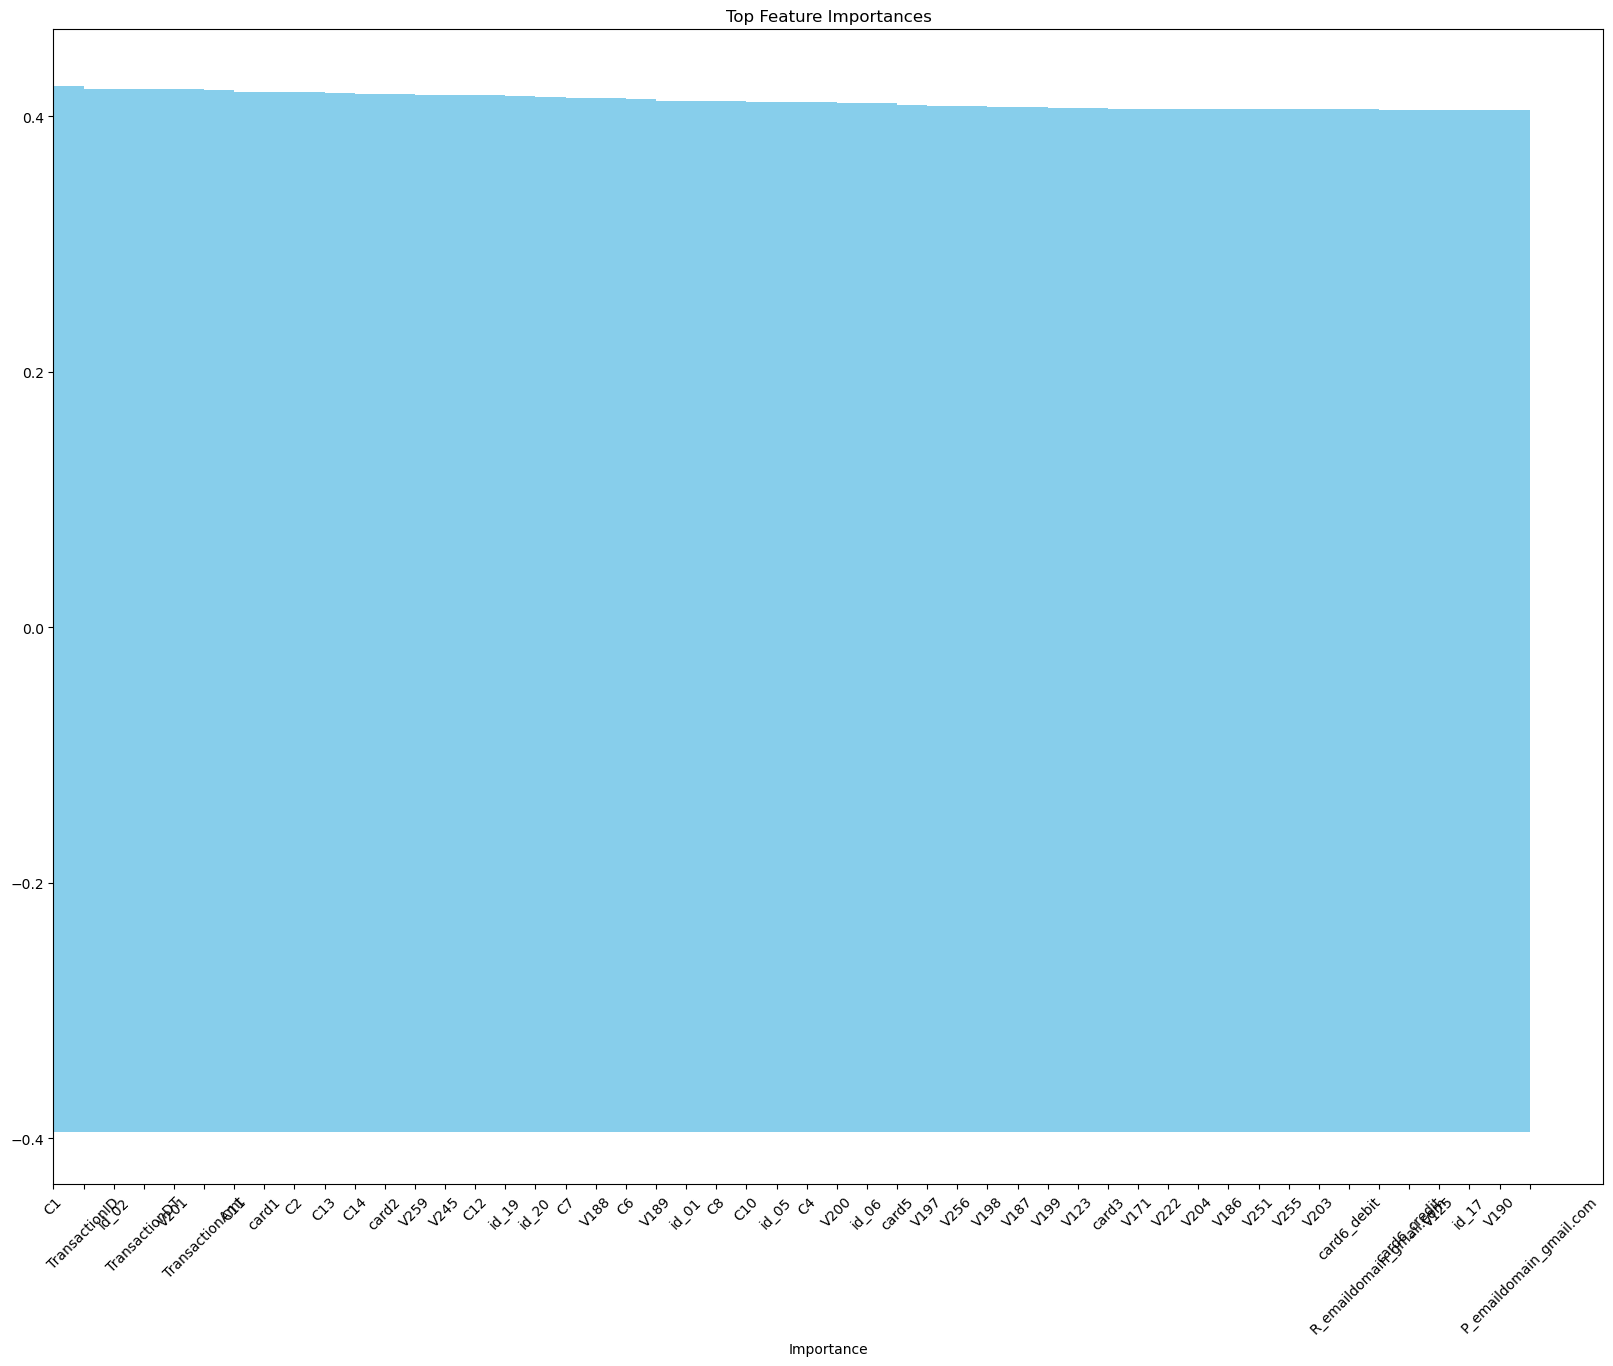

In [101]:
# Extract features and importances
top_features = importances_sorted[:50]
features, importances = zip(*top_features)  # Unpack tuples into two lists

# Create plot
fig, ax = plt.subplots(figsize=(20, 15))  # Set figure size
ax.barh(y=features, width=importances, color='skyblue')  # Create horizontal bar chart
plt.xticks(rotation=45)

# Adding labels and title
ax.set_xlabel('Importance')
ax.set_title('Top Feature Importances')

plt.show()

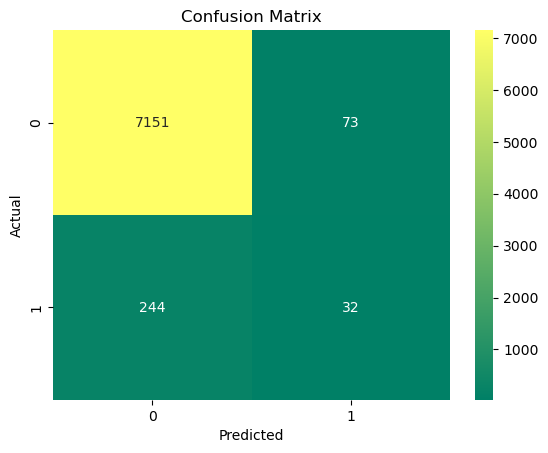

In [102]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='summer')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

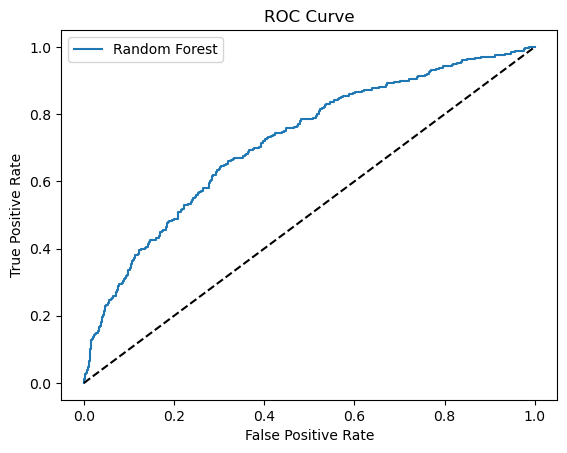

In [103]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [104]:
# Model Optimization and Reporting

In [105]:
# Hyperparameter tuning
# Attempt to optimize the Random Forest model for better performance
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=15), 
                           param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=15),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [106]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Best ROC AUC Score: 0.9393713551608288


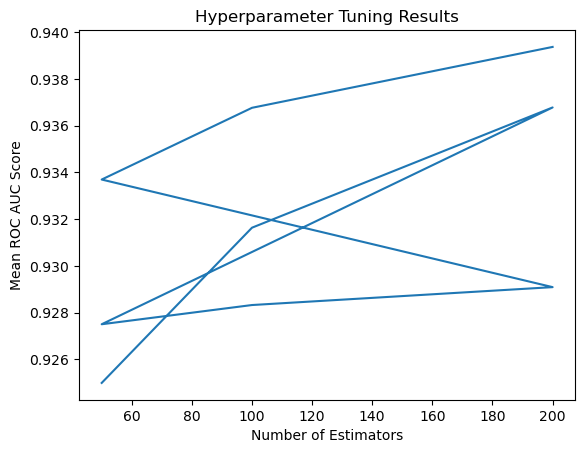

In [107]:
# Line plot of ROC AUC scores
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_estimators'], results['mean_test_score'])
plt.xlabel('Number of Estimators')
plt.ylabel('Mean ROC AUC Score')
plt.title('Hyperparameter Tuning Results')
plt.show()

In [108]:
# Check to see if len(y_pred_forest) and len(predictions) matches
print(len(y_test)) 
print(len(y_pred_forest))
print(len(test_predictions))

7500
7500
7500


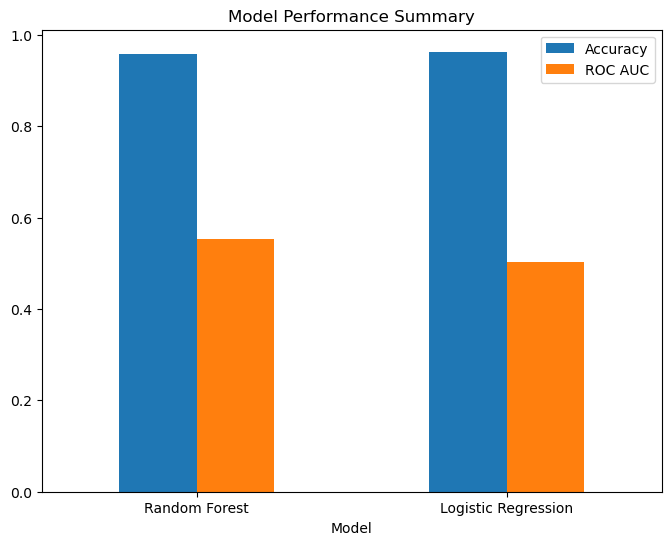

In [109]:
# Summary chart
# To compare model performance visually
summary = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [
        classification_report(y_test, y_pred_forest, output_dict=True)['accuracy'],
        classification_report(y_test, test_predictions, output_dict=True)['accuracy']
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_forest),
        roc_auc_score(y_test, test_predictions)
    ]
}
summary_df = pd.DataFrame(summary)
summary_df.plot(kind='bar', x='Model', figsize=(8, 6))
plt.title('Model Performance Summary')
plt.xticks(rotation=0)
plt.show()

# Finding - Random Forest is the better model to use due to better ROC AUC score, it may be better in detecting fraud